# Best Fit

here we try to create simple linear regression from scratch

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

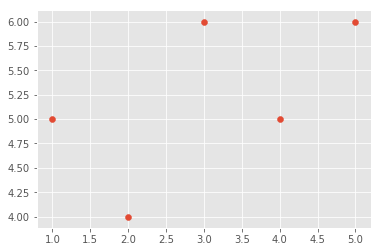

In [2]:
# some randome value to be use as out x and y
xs = [1,2,3,4,5]
ys = [5,4,6,5,6]
# and let's see how our data looks like
plt.scatter(xs,ys)
plt.show()

In [3]:
# normally we will deal with our data in numpy array where there are array operation suitable for machime learning
# something like matrix multiplication an so on

# so, let's convert it into numpy array
xs_arr = np.array(xs, dtype=np.float64)
ys_arr = np.array(ys, dtype=np.float64)

In [4]:
type(xs_arr)

numpy.ndarray

In [5]:
def best_fit_slope_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
         (mean(xs)**2 - mean(xs**2)) )
    b = mean(ys)-m*mean(xs)
    return m, b

In [6]:
m,b = best_fit_slope_intercept(xs_arr, ys_arr)
print(m,b)

0.3 4.3


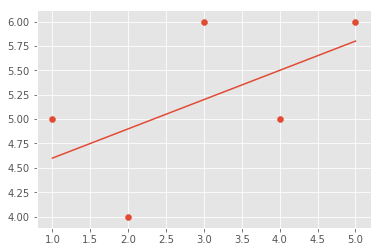

In [7]:
regression_line = [m*x+b for x in xs_arr]
plt.scatter(xs_arr,ys_arr)
plt.plot(xs_arr,regression_line)
plt.show()

In [8]:
# let's try to make some prediction
# y = mx + b
predict_x = 7
predict_y = (m*predict_x)+b
print(predict_y)

6.4


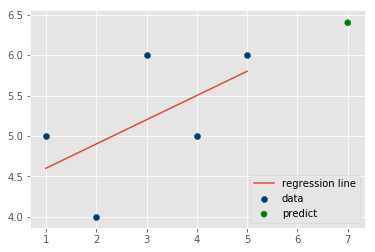

In [9]:
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.scatter(predict_x, predict_y, color='gr', label = 'predict')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

## R Squared and Coefficient of Determination Theory

![alt text](./img/coefficient-of-determination-r-squared.png)

so now after we finding this "best fit line", how can be sure it's actually now it is the best line?
well we need to come up with the calculation on how accurate our line is.
the way to do so is to calculate the distance(actually the displacment in physics sense) between each data and our line.

the we square the error for this following reason
- so we can deal with only positive value
- large error got big penalize (it get square up!)

In [10]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    se_y_mean = squared_error(ys_orig, y_mean_line)
    se_y_regres = squared_error(ys_orig, ys_line)
    return 1 - (se_y_regres / se_y_mean)
    

In [11]:
r_squared = coefficient_of_determination(ys_arr,regression_line)
print(r_squared)

0.321428571429
